<a href="https://colab.research.google.com/github/LCaravaggio/EscueladeInnovacion/blob/main/XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from google.colab import userdata
import json

!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {
    'username': userdata.get('KAGGLE_USER'),
    'key': userdata.get('KAGGLE_KEY')}
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download radheshyamkollipara/bank-customer-churn

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn
License(s): other
bank-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [51]:
import zipfile
import os

os.listdir()

for file in os.listdir():
    if file.endswith('.zip'):
      zip_ref = zipfile.ZipFile(file, 'r')
      zip_ref.extractall()
      zip_ref.close()

In [52]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data = pd.read_csv("Customer-Churn-Records.csv", delimiter=",",header='infer')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [54]:
data.shape

(10000, 18)

In [55]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [58]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Card Type'] = label_encoder.fit_transform(data['Card Type'])

In [65]:
data_new = data_new.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

In [66]:
data_new.dtypes

CreditScore             int64
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Point Earned            int64
Geography_France         bool
Geography_Germany        bool
Geography_Spain          bool
Gender_Female            bool
Gender_Male              bool
Card Type_DIAMOND        bool
Card Type_GOLD           bool
Card Type_PLATINUM       bool
Card Type_SILVER         bool
dtype: object

In [67]:
data_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,True,False,False,True,False,True,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,False,False,True,True,False,True,False,False,False
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,True,False,False,True,False,True,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,True,False,False,True,False,False,True,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,False,False,True,True,False,False,True,False,False


In [68]:
data_y = pd.DataFrame(data_new['Exited'])
data_X = data_new.drop(['Exited'], axis=1)
print(data_X.columns)
print(data_y.columns)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')
Index(['Exited'], dtype='object')


In [69]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=2, stratify=data_y)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(7000, 20)
(3000, 20)
(7000, 1)
(3000, 1)


In [70]:
from sklearn import svm
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [72]:
y_pred = clf.predict(X_test)

In [73]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.9966666666666667


In [75]:
print(metrics.precision_score(y_test, y_pred))

0.9886178861788618


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

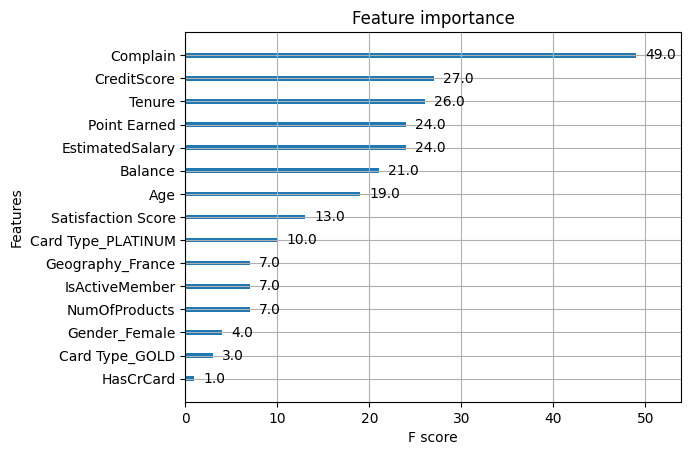

In [74]:
from xgboost import plot_importance
plot_importance(clf)